In [3]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Students Flipping Fair Coins Conclude Coin is Unfair!

Suppose there are 2000 students. Each student:

- is given a fair coin by the instructor but they are not told that it is a fair coin
- collects data by flipping the coin **100 times** and counts the number of times it lands *Heads*
- runs a **hypothesis test**:
    - **Null Hypothesis**: They were givne a fair coin and the number of heads observed see is due to chance.
    - **Alternative Hypothesis**: The coin is biased and so the number of heads they observed is not due to chance alone.
    - **Test Statistic**: abs(num_heads - 50)
- runs 1000 simulations of flipping a fair coin 100 times (using Python)
- reports their p-value and rejects the null hypothesis if their p-value is less than 0.05

We know that we gave all of them fair coints. How often will they incorrectly reject the null hypothesis?

Could you write code to simulate the process of one student running this hypothesis test?

## Simulating the Simulation
In the following we will use simulation to simulate the students running a simulation. Very meta!

1. simulate one coin flip `np.random.choice()`
2. simulate 100 coin flips
3. calculate the observed test statistic
4. simulate one the statistic under the null hypothesis
5. simulate 1000x from null hypothesis
6. calculate p-value

In [13]:
np.random.choice([1,2,3,4,5,6])

2

In [24]:
n_tosses = 100

In [15]:
tosses = np.random.choice(['Heads', 'Tails'], size=n_tosses)

In [25]:
observed_stat = abs(sum(tosses == 'Heads') - n_tosses/2)
observed_stat

3.0

In [27]:
def simulate_one_statistic():
    tosses = np.random.choice(['Heads', 'Tails'], size=n_tosses)
    n_heads = sum(tosses == 'Heads')
    observed_stat = abs(n_heads - n_tosses / 2)
    return observed_stat

In [33]:
observed_stat = simulate_one_statistic()
observed_stat

10.0

In [96]:
n_simulations = 100_000
simulated_stats = []

for i in range(n_simulations):
    simulated_stat = simulate_one_statistic()
    simulated_stats.append(simulated_stat)

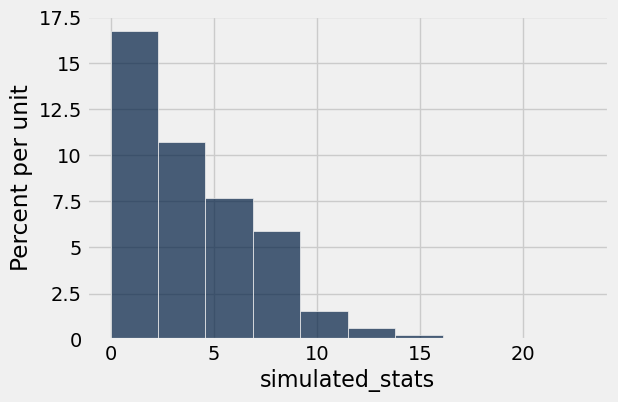

In [97]:
Table().with_column('simulated_stats', simulated_stats).hist()

In [52]:
sum(simulated_stats >= observed_stat) / n_simulations

0.055

### Simulate all students running the experiment

In [53]:
def one_hypothesis_test():
    observed_stat = simulate_one_statistic()
    simulated_stats = []

    for i in range(n_simulations):
        simulated_stat = simulate_one_statistic()
        simulated_stats.append(simulated_stat)
    p_value = sum(simulated_stats >= observed_stat) / n_simulations
    return p_value

In [54]:
one_hypothesis_test()

0.76200000000000001

In [56]:
n_students = 2_000
p_values = []

for i in range(n_students):
    p_value = one_hypothesis_test()
    p_values.append(p_value)

In [57]:
2000 * 100 + 2000 * 1000 * 100 *30

6000200000

## Plot the p-values

You would seldom do this in practice, but here we can visualize the distribution of p-values that all the students in the class get. Some will conclude that they have an unfair coin.

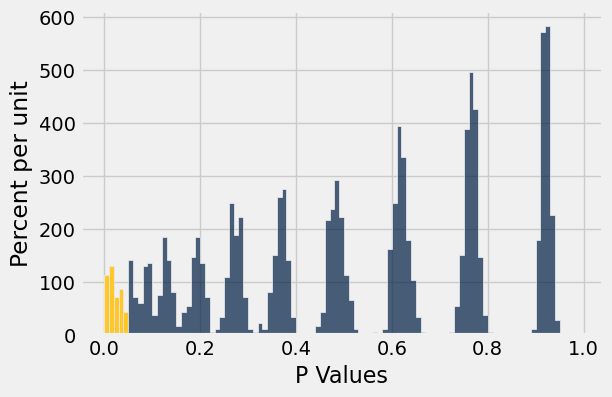

In [58]:
tbl = Table().with_column("P Values", p_values)
tbl.hist("P Values", bins=np.arange(0, 1, 0.01), right_end=0.05)

## Number of students who would reject the null

In [69]:
sum(np.array(p_values) < 0.05)

82

In [59]:
2000 * 0.05

100.0

---

# Super Soda Co and the Case of Bad Taste
Manufacturers of Super Soda run a taste test and 91 out of 200 tasters prefer Super Soda over its rival. The boss is upset! He asks:

Do fewer people prefer Super Soda, or is this just chance?

You run a hypothesis test:

Null Hypothesis: Equal proportions of the population prefer Super Soda as Rival and any variability is due to chance.
Alternative Hypothesis: Fewer people in the population prefer Super Soda than its Rival.
Test Statistic: Number of people who prefer Super Soda
You pick a p-value cutoff of 0.05

In [4]:
sum(np.random.choice(['H', 'T'], 200, p=[0.1, 0.9]) == 'H')

16

In [5]:
obs_statistic = 91

In [6]:
def one_simulated_stat():
    survey = np.random.choice(['Super', 'Rival'], 200)
    n_super = sum(survey == 'Super')
    return n_super

In [7]:
simulated_stats = []
n_simulations = 10_000
for i in range(10_000):
    simulated_stat = one_simulated_stat()
    simulated_stats.append(simulated_stat)

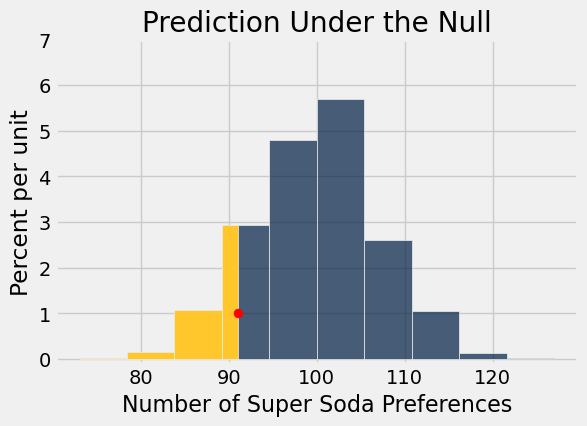

In [18]:
trials = Table().with_column('Number of Super Soda Preferences', simulated_stats)
trials.hist(right_end=obs_statistic)
plots.ylim(-0.001, 0.07)
plots.scatter(obs_statistic, 0.01, color='red', s=40, zorder=1)
plots.title('Prediction Under the Null');

In [9]:
sum(np.array(simulated_stats) <= obs_statistic) / n_simulations

0.1166

## Changing the number of simulations
What happens if we run a different number of simulations?

### Simulating the Simulation (Again)
We can again run multiple simulations of our simulation.

In [ ]:
# For larger numbers of simulations, p-values are more consistent
tests.hist("p-value for 91", group='simulations', bins=20)

### Law of Large Number
The reason the p-values concentrate towards the true p-value is that the emprical distribution under the null is better approximates by increasing the number of simulations. More is better!

In [ ]:
t1 = Table().with_columns("Number of Super Soda Preferences", simulate_null(100, 200),
                           "Simulation Size", 100)

t2 = Table().with_columns("Number of Super Soda Preferences", simulate_null(100_000, 200),
                           "Simulation Size", 100_000)

t1.append(t2).hist(group='Simulation Size', bins=np.arange(70.5, 131, 1))

## The Importance of Sample Size
Larger samples give us more information about the population and also allow us to test more subtle differences.

Suppose that the true proportion of people who prefer Super Soda is 45%

In [ ]:
true_proportion = 0.45
true_distribution = make_array(true_proportion, 1 - true_proportion)
true_distribution

Taste tests with 200 people will give varioius numbers of people who prefer Super Soda

In [ ]:
sample_size = 200
sample_proportions(sample_size, true_distribution) * sample_size

In [ ]:
# If you run a taste test for 200 people, what might you conclude?
def run_experiment(num_simulations, sample_size, true_proportion):
    # Collect data
    true_distribution = make_array(true_proportion, 1 - true_proportion)
    taste_test_results = sample_proportions(sample_size, true_distribution) * sample_size
    observed_stat_from_this_sample = taste_test_results.item(0)
    
    # Conduct hypothesis test
    p_value = run_test(num_simulations, sample_size, observed_stat_from_this_sample)
    return p_value

run_experiment(10000, 200, 0.45)

Try using different values for the true_proportion and sample size. What happens to as the true proportion gets closer to 0.5? What happens if we increase the sample size.

In [ ]:
# Let's imagine running our taste test over and over again to see how often we reject the null
true_proportion = 0.45
sample_size = 100
p_values = make_array()
for k in np.arange(100):
    p_value = run_experiment(1000, sample_size, true_proportion)
    p_values = np.append(p_values, p_value)
Table().with_column('P-value', p_values).hist(0, right_end=0.05, bins=np.arange(0,1,0.1))
print("Percent that correctly reject the null", 100*np.mean(p_values <= 0.05))

# Example: Benford's Law

https://en.wikipedia.org/wiki/Benford%27s_law

In [ ]:
digits = np.arange(1, 10)
benford_model = np.log10(1 + 1/digits)

In [ ]:
benford = Table().with_columns(
    'First digit', digits,
    'Benford model prob', benford_model)
benford.barh('First digit')

In [ ]:
# You don't have to understand how this function works, since it uses Python features from beyond Data 8.
def first_digit(num):
    return int(str(num)[0])

In [ ]:
# County populations from the census data
counties = Table.read_table('data/counties.csv')
counties = counties.where('SUMLEV', 50).select(5,6,9).relabeled(0,'State').relabeled(1,'County').relabeled(2,'Population')
counties.show(3)

In [ ]:
first_digits = counties.apply(first_digit, 'Population')
counties = counties.with_column('First digit', first_digits)
counties.show(3)

In [ ]:
num_counties = counties.num_rows

In [ ]:
by_digit = counties.group('First digit')
proportions = by_digit.column('count')/num_counties
by_digit = by_digit.with_columns(
    'Proportion', proportions,
    'Benford proportion', benford_model
)
by_digit.drop('count').barh('First digit')

Null hypothesis:  the match up with  the bendfrd model is due to chance

Alternative hypothesis:  similarities in our counties' proportion and Benford's model are 

Test statistic: ___

Fill in the blank with "Bigger" or "Smaller":

___ values of the test statistic favor the alternative

In [ ]:
observed_tvd = sum(abs(proportions - benford_model))/2
observed_tvd
print(proportions)
print(benford_model)

In [ ]:
sample_proportions(num_counties, benford_model)

In [ ]:
simulated_frequencies = sample_proportions(num_counties, benford_model)
tvd = sum(abs(simulated_frequencies - benford_model))/2
tvd

In [ ]:
def simulate_county_first_digits():
    simulated_frequencies = sample_proportions(num_counties, benford_model)
    tvd = sum(abs(simulated_frequencies - benford_model))/2
    return tvd

In [ ]:
simulated_tvds = make_array()

for i in np.arange(10000):
    simulated_tvds = np.append(simulated_tvds, simulate_county_first_digits())

In [ ]:
Table().with_column('Simulated TVD', simulated_tvds).hist(0)

In [ ]:
np.count_nonzero(simulated_tvds >= observed_tvd) / 10000

Are the data consistent with the null hypothesis?

## Example: sleep survey

In [ ]:
survey = Table.read_table('data/sleep_survey.csv')
survey

In [ ]:
def simplify(sleep_position):
    if sleep_position == 'On your left side' or sleep_position == 'On your right side':
        return 'side'
    else:
        return 'back or stomach'
    
survey = survey.with_column(
    'position',
    survey.apply(simplify, 'Sleep position')
).select('position', 'Hours of sleep')

survey

In [ ]:
survey.group('position', np.average)

Null hypothesis:  Any differences between average hours of sleep between back/stomach sleepersor side sleepers is due to chance

Alternative hypothesis:  

Back/stomach sleepers on average get more sleep than side sleepers


Test statistic:

__ Average hours of sleep for back/stomach - Average hours of sleep for side __
__ Asolute value of (Average hours of sleepfor back/stomach - Average hours of sleep for side) __



Fill in the blank with "Bigger" or "Smaller":

__ Larger __ values of the test statistic favor the alternative

In [ ]:
def compute_test_statistic(tbl):
    grouped = tbl.group('position', np.average)
    avgs = grouped.column('Hours of sleep average')
    return avgs.item(1) - avgs.item(0)

In [ ]:
obs_test_stat = compute_test_statistic(survey)
obs_test_stat

In [ ]:
random_labels = survey.sample(with_replacement=False).column('position')

In [ ]:
def simulate_under_null():
    random_labels = survey.sample(with_replacement=False).column('position')
    relabeled_tbl = survey.with_column('position', random_labels)
    return compute_test_statistic(relabeled_tbl)


In [ ]:
simulated_diffs = make_array()
for i in np.arange(1000):
    null_stat = simulate_under_null()
    simulated_diffs = np.append(simulated_diffs, null_stat)

In [ ]:
Table().with_column('Simulated difference', simulated_diffs).hist(0)

In [ ]:
obs_test_stat

In [ ]:
np.mean(simulated_diffs <= obs_test_stat)

Are the data consistent with the null hypothesis?